In [1]:
import pandas as pd
from random import choice
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson3/lesson_3_data.csv', encoding = 'windows-1251')

In [3]:
df_lesson3 = pd.DataFrame({'Клиент id': np.random.randint(1, 10000, 30),
                            'Пол': np.random.choice([0,1],30),
                            'Благосостояние': np.random.choice(['low', 'medium', 'high'],30),
                            'Возраст': np.random.randint(20,70,30)})

In [4]:
df_lesson3 = df_lesson3.rename(columns={"Клиент id": "client_id", "Пол": "sex", "Благосостояние": "wealth", "Возраст": "age"})

In [5]:
df_lesson3.head()


,client_id,sex,wealth,age
0,4154,0,low,33
1,6591,1,low,28
2,7057,1,high,20
3,6885,0,low,47
4,2936,0,medium,47


In [6]:
unique_num =pd.Series({'client_id': df_lesson3.client_id.nunique(), 'sex': df_lesson3.sex.nunique(), 'wealth': df_lesson3.wealth.nunique(), 'age': df_lesson3.age.nunique()})

In [8]:
df_lesson3.sex.nunique()

2

In [9]:
unique_num

client_id    30
sex           2
wealth        3
age          23
dtype: int64

In [10]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [11]:
user_df = df[['tc', 'art_sp']]

In [12]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [13]:
brand_name.split(' ')[-1] #разделить по указателю - пробел. Берем первый с конца элемент

NameError: name 'brand_name' is not defined

In [14]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [15]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [16]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [17]:
split_brand('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [18]:
#Lesson2

In [19]:
names = 'Name1 Surname1, Name2 Surname2'

In [20]:
names_list = names.split(',')

In [21]:
names_list

['Name1 Surname1', ' Name2 Surname2']

In [22]:
user_df['brand_mark'] = user_df.brand_info.apply(split_brand)

In [23]:
user_df.head()   

,user_id,brand_info,brand_mark
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [24]:
user_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_mark': 'count'}) \
    .rename(columns={'brand_mark': 'purchases'}) \
    .query('purchases >= 5')

In [25]:
users_unique_brands = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_mark': pd.Series.nunique}) \
    .rename(columns={'brand_mark': 'unique_brand'})

In [26]:
users_unique_brands

,user_id,unique_brand
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [27]:
user_purchases.head(5) #Сохранили ID покупателей с числом покупок больше 5

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [28]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_mark'],as_index= False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(["user_id", 'brand_info'], ascending = [False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns = {'brand_mark': 'lovely_brand', 'brand_info': 'lovely_brand_purchases'})

In [29]:
lovely_brand_purchases_df.head(5) #Сохранили число покупок любимого бренда 

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [30]:
loyalty_df = user_purchases.merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [31]:
loyalty_df

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [32]:
loyal_users = loyalty_df[loyalty_df.unique_brand == 1]

In [33]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [34]:
loyalty_df


,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


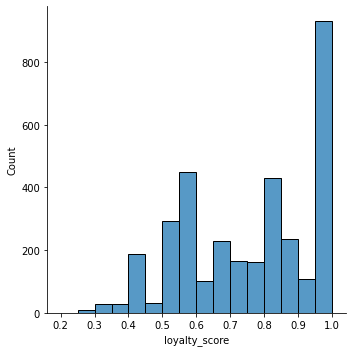

In [35]:
ax = sns.displot(loyalty_df.loyalty_score)

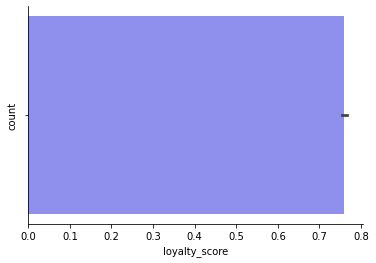

In [41]:
ax = sns.barplot(x='loyalty_score', data=loyalty_df, color='blue', alpha=0.5)
ax.set(xlabel='loyalty_score', ylabel='count')
sns.despine()  # убрать часть рамки графика
plt.show()

In [42]:
brand_loyalty = loyalty_df.groupby('lovely_brand',as_index = False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) \
    .sort_valuess('')

AttributeError: 'DataFrame' object has no attribute 'sort_valuess'

In [43]:
ax = sns.barplot(x="lovely_brand", y="loyalty_score", data=brand_loyalty)

NameError: name 'brand_loyalty' is not defined

In [44]:
#ПОШЛИ ЗАДАЧИ

In [45]:
import pandas as pd

In [46]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson3/3_taxi_peru.csv'

In [47]:
taxi_peru_df = pd.read_csv(path_to_file, encoding='Windows-1251', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [48]:
taxi_peru_df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:34:00,"-12,13874817","-76,99536133",2010-01-06 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:29:00,"-12,13885117","-76,99530029",2010-01-06 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-11-09 23:55:00,"-12,08995438","-76,92626953",2010-12-09 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-11-09 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-02-10 05:26:00,"-12,09253011","-77,02875271",2010-02-10 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-02-10 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [50]:
new_taxi = pd.DataFrame(taxi_peru_df.source.value_counts(normalize=True).round(2))#Перевод в проценты

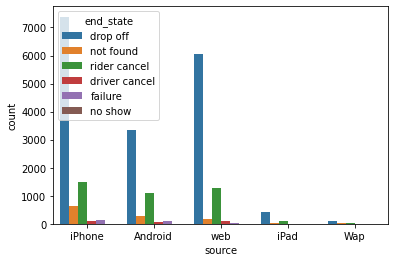

In [51]:
sns.countplot(x='source', hue='end_state', data=taxi_peru_df)

In [52]:
driver_score_counts = taxi_peru_df.driver_score.value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index()\
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score', ascending=True)

In [53]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [54]:
rider_score_counts = taxi_peru_df.rider_score.value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index()\
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score', ascending=True)

In [55]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


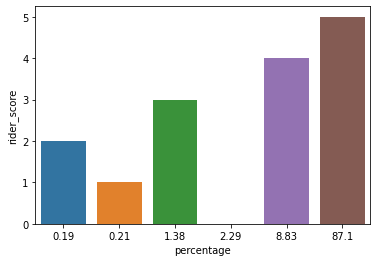

In [59]:
sns.barplot(x='percentage', y= 'rider_score', data =rider_score_counts)# Оценка ВОДИТЕЛЯМИ клиентов

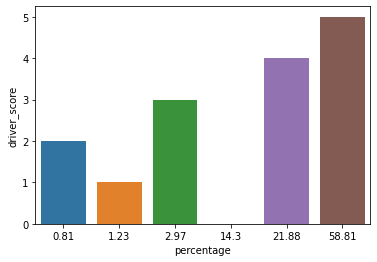

In [61]:
sns.barplot(x='percentage', y= 'driver_score', data =driver_score_counts)# Оценка КЛЕНТАМИ водителей